In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [17]:
# fetch dataset

df = pd.read_csv("/Users/imane-ia/code/DiabeticRetinopathyProject/data/data_retino.csv",index_col=False)
if 'Unnamed: 0' in df.columns:
    # Create a new DataFrame without the unnamed column
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

quality  pre_screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   

    exudate3  exudate3.1  exudate5  exudate6  exudate7  exudate8  \
0   5.270920    0.771761  0.018632  0.006864  0.003923  0.003923   
1   3.325423    0.234185  0.003903  0.003903  0.003903  0.003903   
2  12.687485    4.852282  1.393889  0.373252  0.041817  0.007744   
3   9.118901    3.079428  0.840261  0.272434  0.007653  0.001531   
4   0.410381    0.000000  0.000000  0.000000  0.000000  0.000000   

   macula_opticdisc_distance  opticdisc_diameter  am_fm_classification  Class  
0                   0.486903            0.100025                     1      0  
1                   0.520908            0.144414                     0      0  
2                   0.530904            0.128548                     0      1  
3                   0.483284            0.114790                     0      0  
4                   0.475935            0.123572                     0      1

In [68]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The featutres are {df.columns}")
print(f"The number of null values is {df.isna().sum().sum()}")
print(f"The number of duplicated rows is is {df.duplicated().sum().sum()}")



We have 1151 rows and 20 columns
The featutres are Index(['quality', 'pre_screening', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6',
       'exudate1', 'exudate2', 'exudate3', 'exudate3.1', 'exudate5',
       'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance',
       'opticdisc_diameter', 'am_fm_classification', 'Class'],
      dtype='object')
The number of null values is 0
The number of duplicated rows is is 5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quality                    1151 non-null   int64  
 1   pre_screening              1151 non-null   int64  
 2   ma1                        1151 non-null   int64  
 3   ma2                        1151 non-null   int64  
 4   ma3                        1151 non-null   int64  
 5   ma4                        1151 non-null   int64  
 6   ma5                        1151 non-null   int64  
 7   ma6                        1151 non-null   int64  
 8   exudate1                   1151 non-null   float64
 9   exudate2                   1151 non-null   float64
 10  exudate3                   1151 non-null   float64
 11  exudate3.1                 1151 non-null   float64
 12  exudate5                   1151 non-null   float64
 13  exudate6                   1151 non-null   float

In [20]:
df.describe()

quality  pre_screening          ma1          ma2          ma3  \
count  1151.000000    1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.996525       0.918332    38.428323    36.909644    35.140747   
std       0.058874       0.273977    25.620913    24.105612    22.805400   
min       0.000000       0.000000     1.000000     1.000000     1.000000   
25%       1.000000       1.000000    16.000000    16.000000    15.000000   
50%       1.000000       1.000000    35.000000    35.000000    32.000000   
75%       1.000000       1.000000    55.000000    53.000000    51.000000   
max       1.000000       1.000000   151.000000   132.000000   120.000000   

               ma4          ma5          ma6     exudate1     exudate2  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     32.297133    28.747176    21.151173    64.096674    23.088012   
std      21.114767    19.509227    15.101560    58.485289    21.602696   
min       1.000000     1.000000     1.000000     0.349274     0.000000   
25%      14.000000    11.000000     8.000000    22.271597     7.939315   
50%      29.000000    25.000000    18.000000    44.249119    17.038020   
75%      48.000000    43.000000    32.000000    87.804112    31.305692   
max     105.000000    97.000000    89.000000   403.939108   167.131427   

          exudate3   exudate3.1     exudate5     exudate6     exudate7  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean      8.704610     1.836489     0.560738     0.212290     0.085674   
std      11.567589     3.923224     2.484111     1.057126     0.398717   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.249050     0.081554     0.000000     0.000000     0.000000   
50%       4.423472     0.484829     0.022248     0.001554     0.000000   
75%      11.766880     1.921648     0.191953     0.038450     0.004832   
max     106.070092    59.766121    51.423208    20.098605     5.937799   

          exudate8  macula_opticdisc_distance  opticdisc_diameter  \
count  1151.000000                1151.000000         1151.000000   
mean      0.037225                   0.523212            0.108431   
std       0.178959                   0.028055            0.017945   
min       0.000000                   0.367762            0.057906   
25%       0.000000                   0.502855            0.095799   
50%       0.000000                   0.523308            0.106623   
75%       0.003851                   0.543670            0.119591   
max       3.086753                   0.592217            0.219199   

       am_fm_classification        Class  
count           1151.000000  1151.000000  
mean               0.336229     0.530843  
std                0.472624     0.499265  
min                0.000000     0.000000  
25%                0.000000     0.000000  
50%                0.000000     1.000000  
75%                1.000000     1.000000  
max                1.000000     1.000000

In [21]:
df['Class'].value_counts()

Class
1    611
0    540
Name: count, dtype: int64

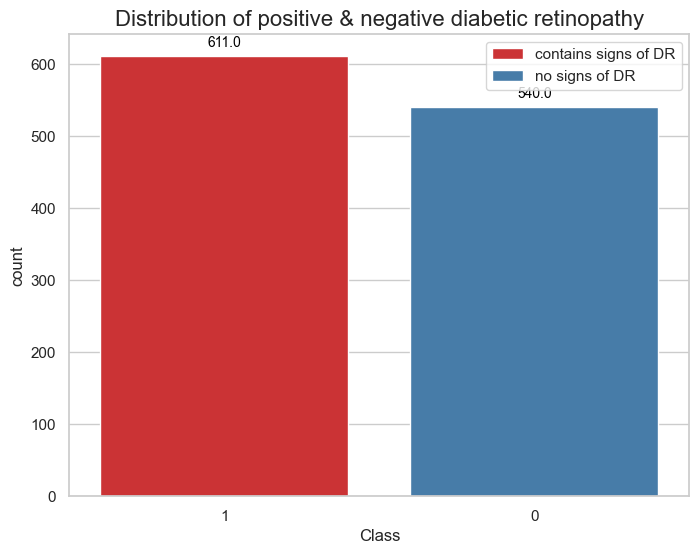

In [414]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='Class',data = df,palette='Set1', order=df['Class'].value_counts().index)
# Adding value annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title("Distribution of positive & negative diabetic retinopathy",fontsize=16)
plt.legend(labels=['contains signs of DR', 'no signs of DR'], loc='upper right')

plt.show()


In [52]:
df['am_fm_classification'].value_counts()

am_fm_classification
0    764
1    387
Name: count, dtype: int64

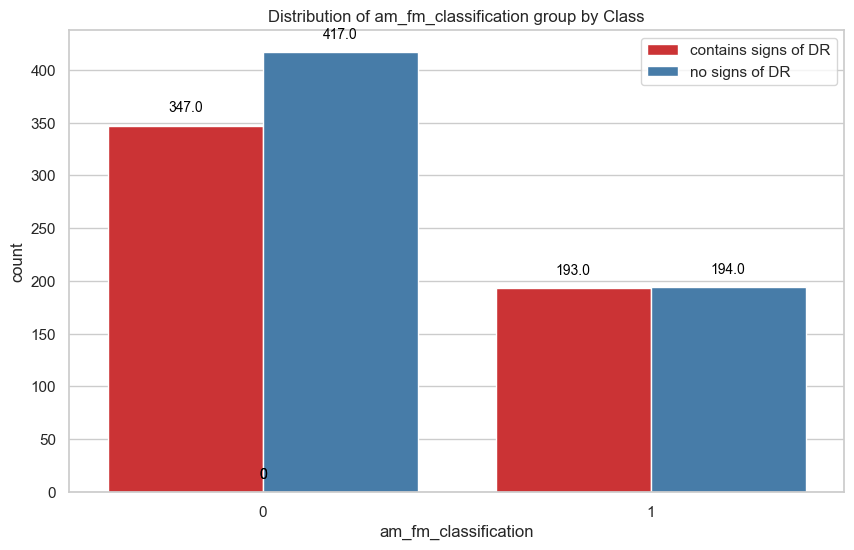

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='am_fm_classification', hue='Class', data=df,palette='Set1')
plt.title("Distribution of am_fm_classification group by Class")

#plt.savefig("Combined_Distribution.png")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.legend(labels=['contains signs of DR', 'no signs of DR'], loc='upper right')


plt.show()

In [53]:
#Create a contingency table
contingency_table = pd.crosstab(df['Class'], df['am_fm_classification'])

# Display the contingency table
print(contingency_table)

am_fm_classification    0    1
Class                         
0                     347  193
1                     417  194


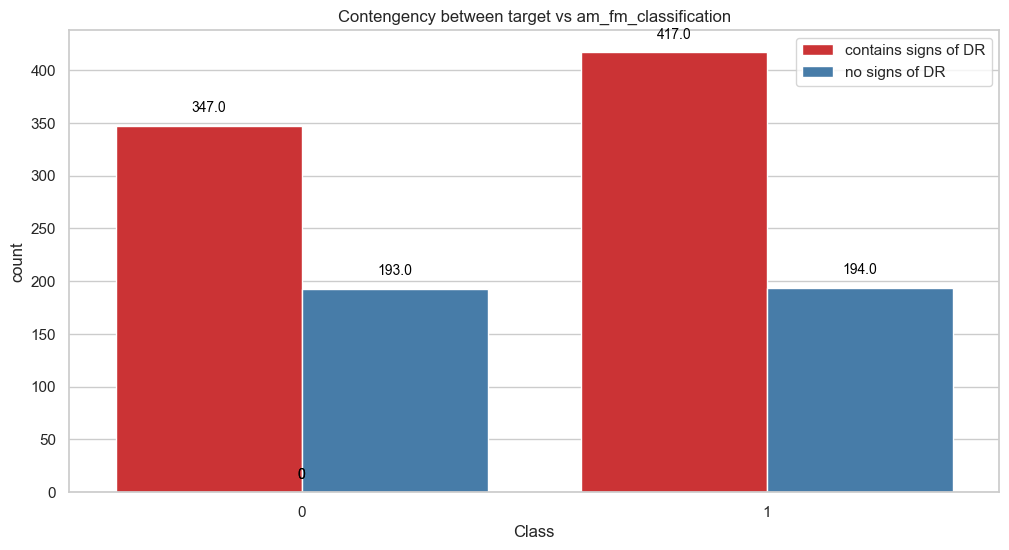

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', hue='am_fm_classification',data=df,palette='Set1')
plt.title("Contengency between target vs am_fm_classification")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.legend(labels=['contains signs of DR', 'no signs of DR'], loc='upper right')


plt.show()

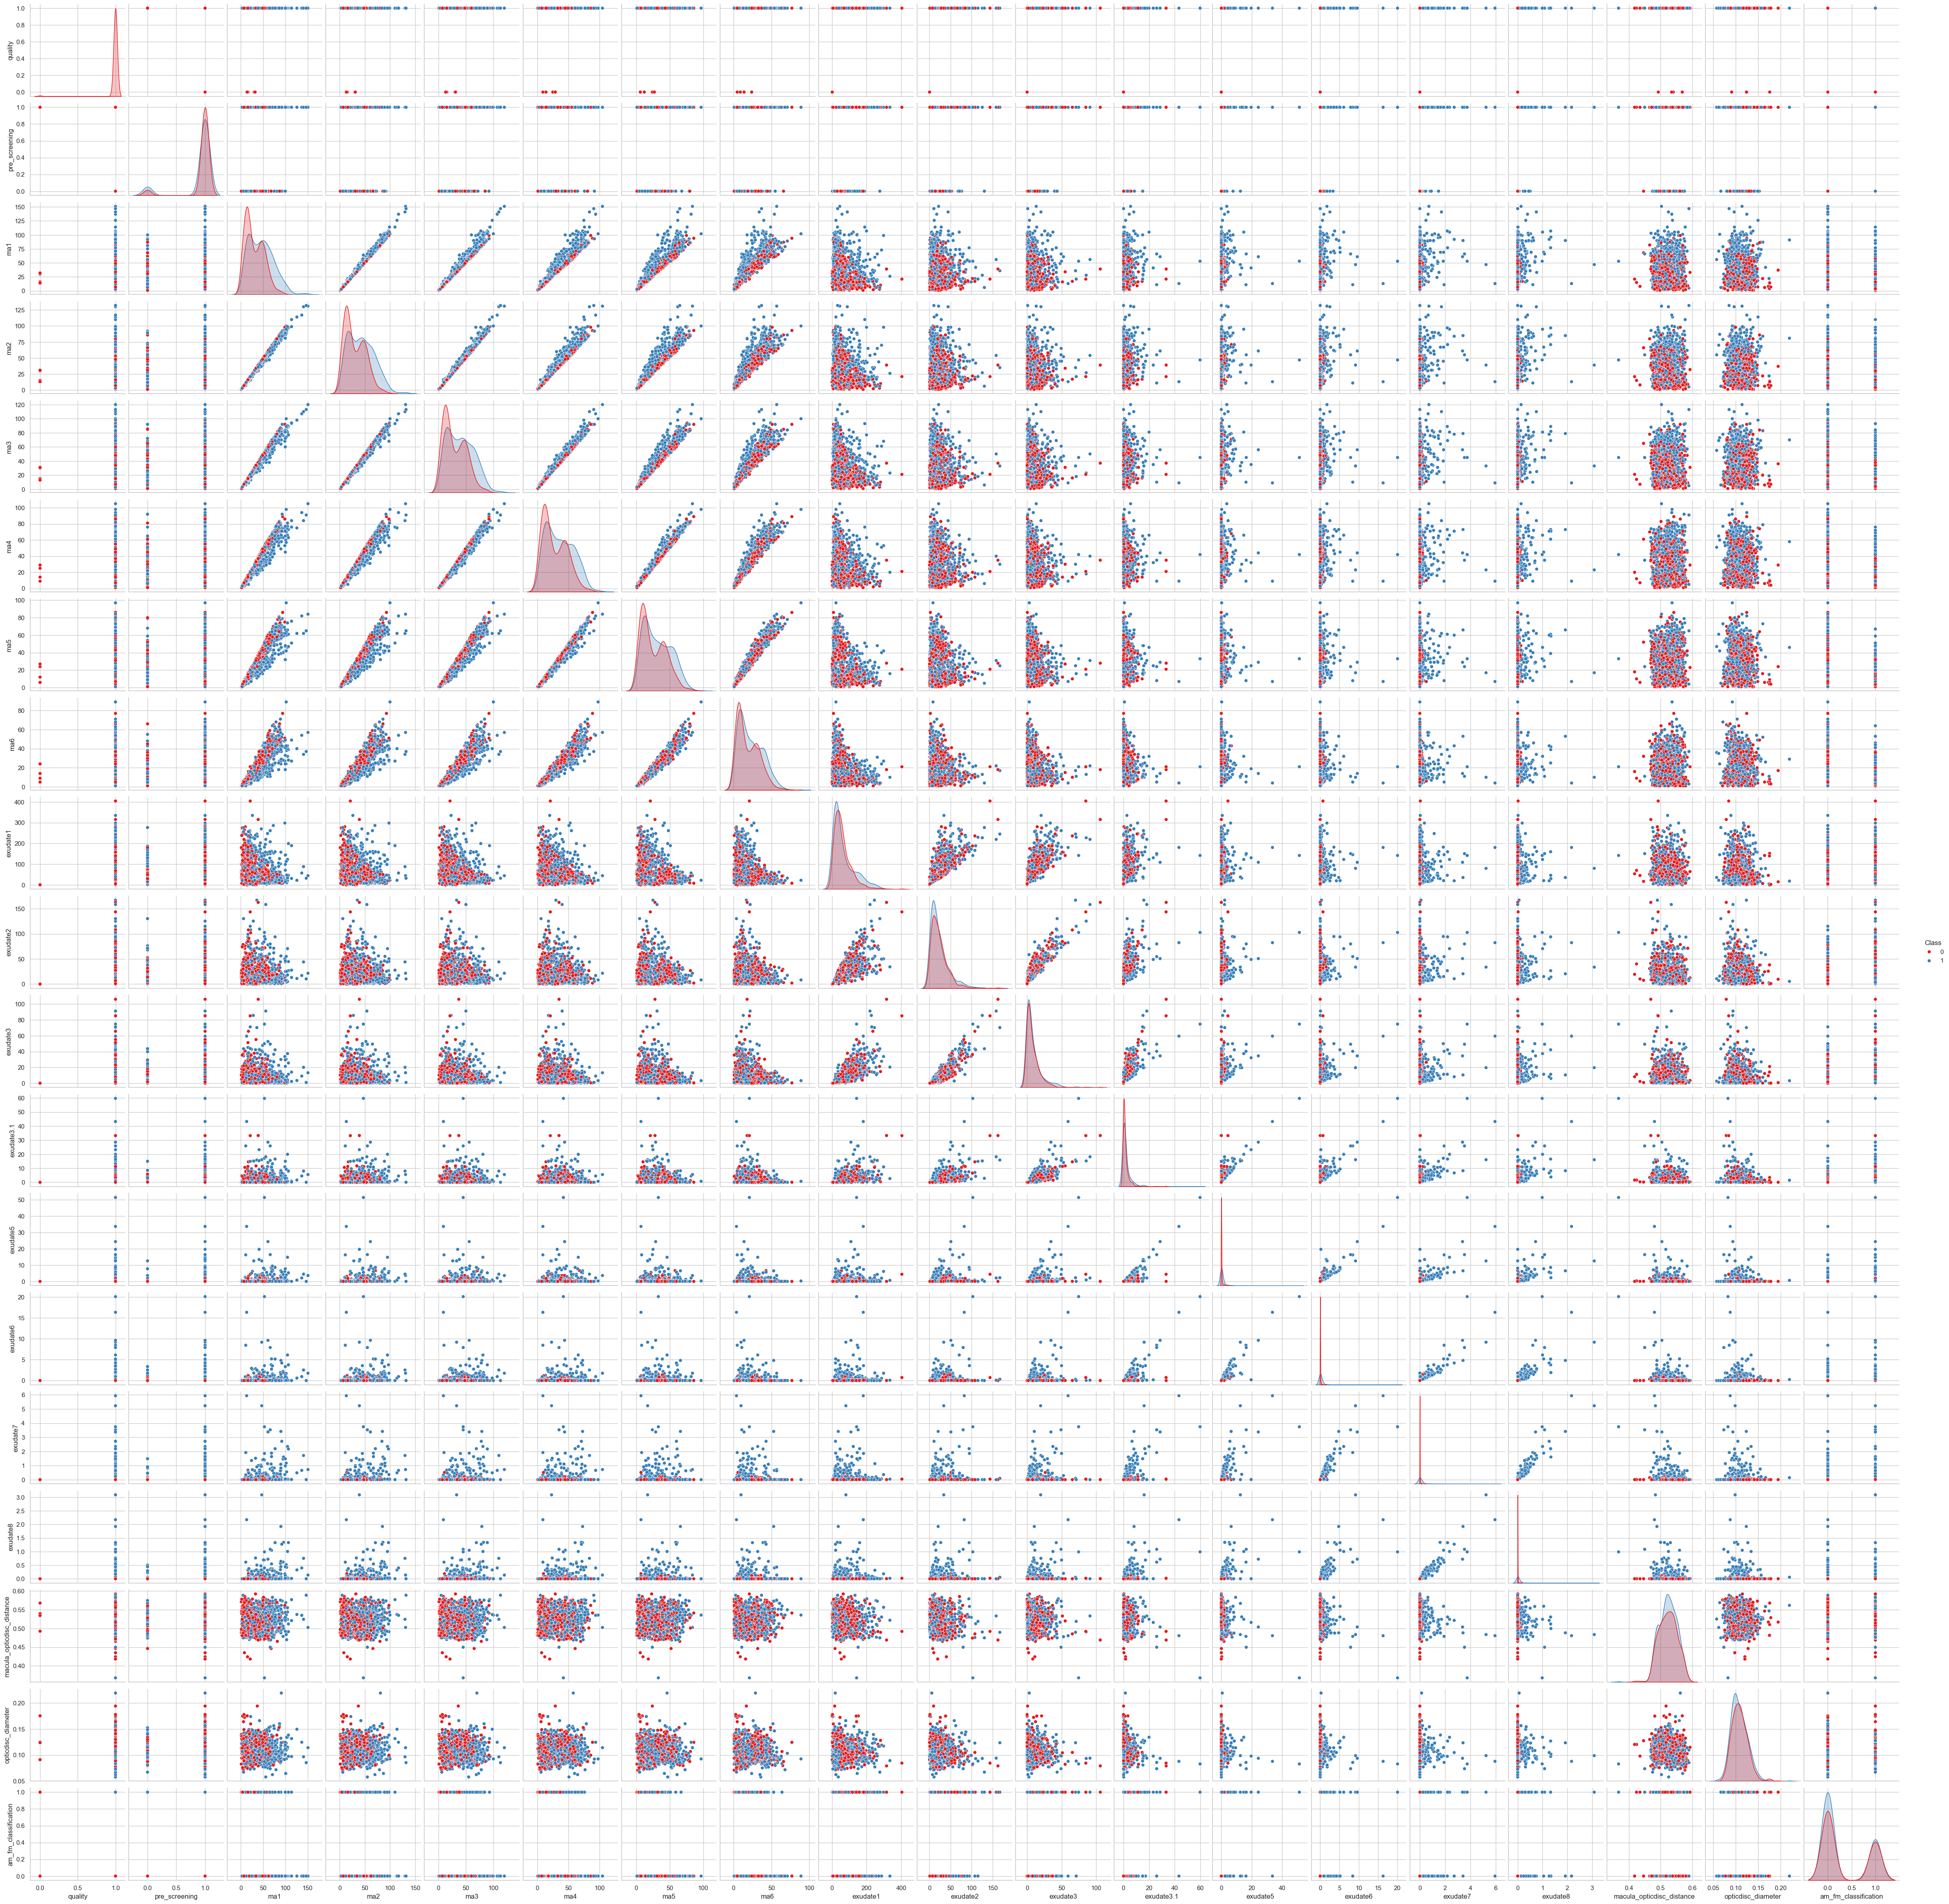

In [61]:

sns.pairplot(df,hue='Class',palette='Set1')

In [374]:
X = df.drop('Class',axis=1).values
y = df['Class'].values
#Let split our data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)


In [375]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate the model
dt = DecisionTreeClassifier() # Per default, criterion="gini"; you could specify criterion="entropy"
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

recall_score_dt = recall_score(y_test,y_pred_dt)
f1_score_dt = f1_score(y_test,y_pred_dt)
classification_report_dt = classification_report(y_test,y_pred_dt)


print(f"The recall score of the Decision Tree Model is {round(recall_score_dt,2)}")
print(f"The F1 score of the Decision Tree Model is {round(f1_score_dt,2)} \n")
print(f"The classification report of the Decision Tree Model is \n {classification_report_dt}")


The recall score of the Decision Tree Model is 0.61
The F1 score of the Decision Tree Model is 0.65 

The classification report of the Decision Tree Model is 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65       108
           1       0.69      0.61      0.65       123

    accuracy                           0.65       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.65      0.65      0.65       231



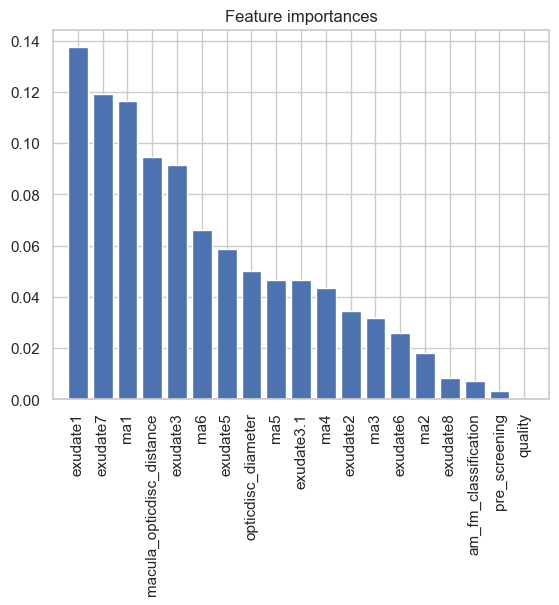

In [92]:
features = df.columns
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="b", align="center",)
plt.xticks(range(num_features), [features[i] for i in indices], rotation='vertical')
plt.xlim([-1, num_features])

plt.show()

<Axes: >

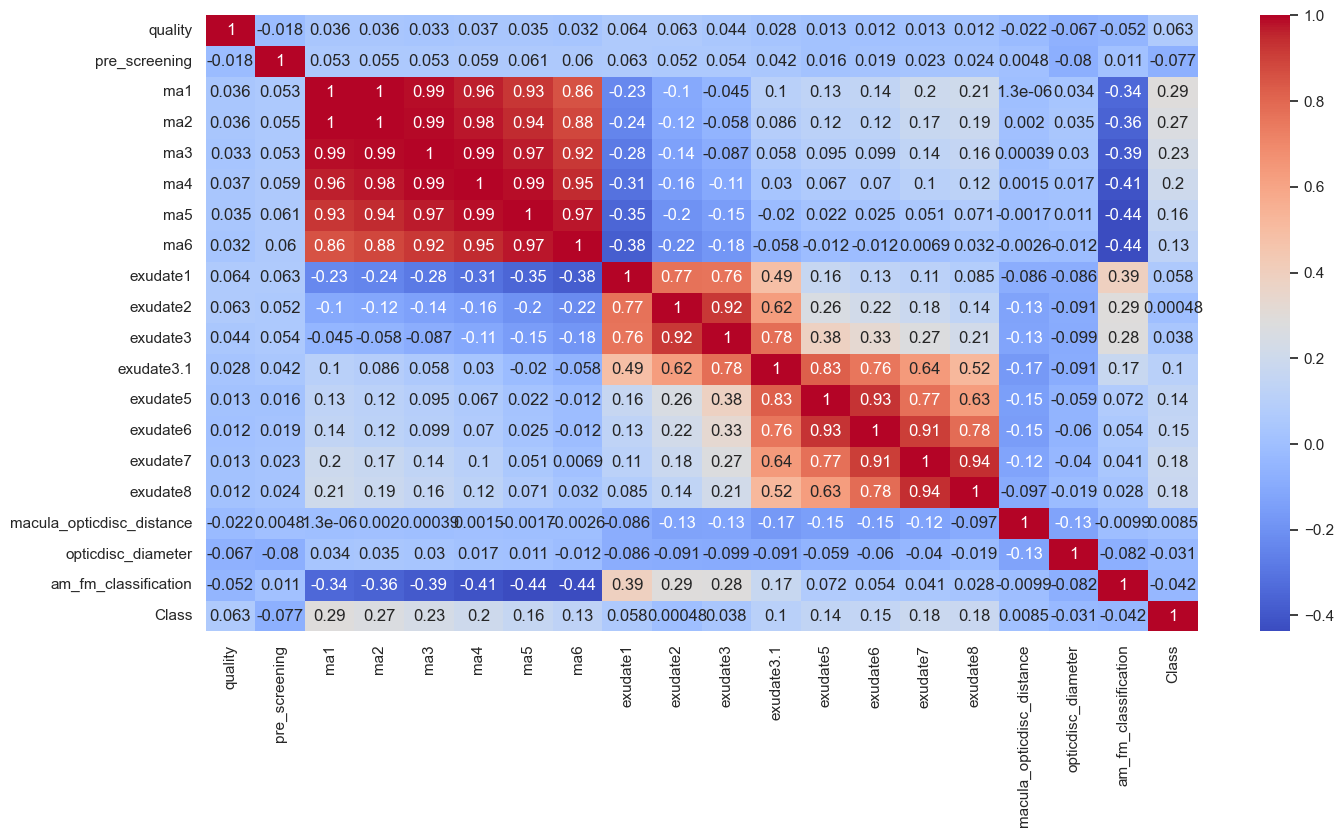

In [376]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [377]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed
    Output:
        dataframe that contains only the non-highly-collinear features
    '''
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x


In [380]:
df_cleaned = remove_collinear_features(df,0.92)

X_small = df_cleaned.drop(["Class"],axis=1).values
#split again
X_small_train,X_small_test,y_train,y_test = train_test_split(X_small,y,test_size=0.3)
df_cleaned.shape

Removed Columns {'ma6', 'ma4', 'ma3', 'exudate8', 'ma2', 'ma5', 'exudate6'}


(1151, 13)

Performance of Logistic Regression: 0.630057803468208 and on train  0.6770186335403726
The recall score of the Logistic regression Model is 0.65
The F1 score of the Logistic regression Model is 0.63
The classification report of the Logistic regression Model is 
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       178
           1       0.61      0.65      0.63       168

    accuracy                           0.63       346
   macro avg       0.63      0.63      0.63       346
weighted avg       0.63      0.63      0.63       346



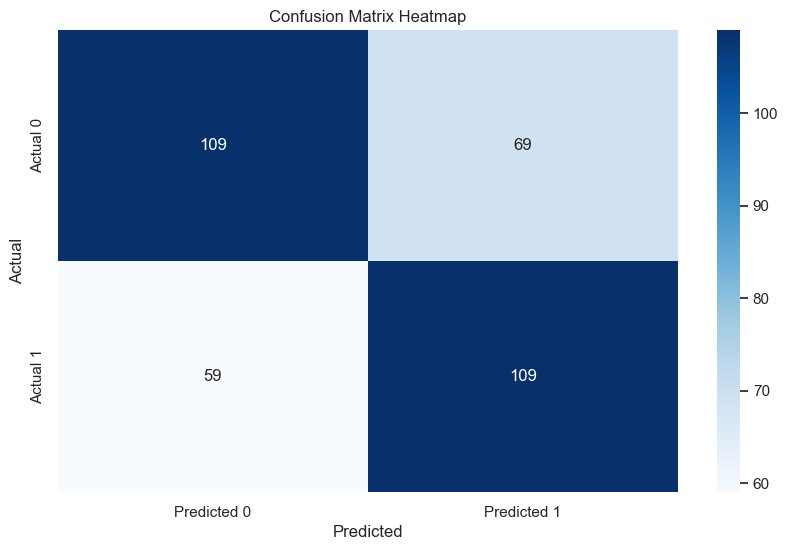

In [381]:
#Instantiate the model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_small_train,y_train)
y_pred_lr = lr.predict(X_small_test)


print(f"Performance of Logistic Regression: {lr.score(X_small_test,y_test)} and on train  {lr.score(X_small_train,y_train)}")

recall_score_lr = recall_score(y_test,y_pred_lr)
f1_score_lr = f1_score(y_test,y_pred_lr)
classification_report_lr= classification_report(y_test,y_pred_lr)

print(f"The recall score of the Logistic regression Model is {round(recall_score_lr,2)}")
print(f"The F1 score of the Logistic regression Model is {round(f1_score_lr,2)}")
print(f"The classification report of the Logistic regression Model is \n {classification_report_lr}")


cm = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True,cmap="Blues",fmt="d",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


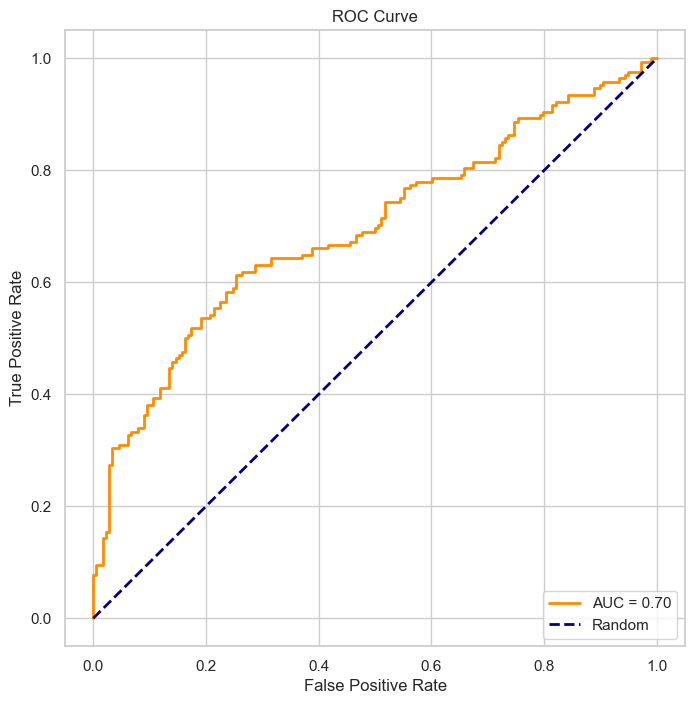

In [382]:
# Predict probabilities for the positive class
y_probabilities = lr.predict_proba(X_small_test)[:, 1]

# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [383]:
#preprecess data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_small_train)
X_test_scaled = scaler.transform(X_small_test)



In [385]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

recall_score_knn = recall_score(y_test,y_pred_knn)
f1_score_knn = f1_score(y_test,y_pred_knn)
classification_report_knn = classification_report(y_test,y_pred_knn)

print(f"The recall score of the KNN Model is {round(recall_score_knn,2)}")
print(f"The F1 score of the KNN Model is {round(f1_score_knn,2)} \n")

print(f"The classification report of the K-nearst neighbors Model is \n {classification_report_knn}")



The recall score of the KNN Model is 0.64
The F1 score of the KNN Model is 0.62 

The classification report of the K-nearst neighbors Model is 
               precision    recall  f1-score   support

           0       0.64      0.61      0.63       178
           1       0.61      0.64      0.62       168

    accuracy                           0.62       346
   macro avg       0.62      0.62      0.62       346
weighted avg       0.63      0.62      0.62       346



In [386]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_small_train)
X_test_scaled = scaler.transform(X_small_test)


In [389]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()
sgd.fit(X_train_scaled,y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

print(f"Performance of SGD: {sgd.score(X_test_scaled,y_test)} and on train  {sgd.score(X_train_scaled,y_train)}")

recall_score_sgd = recall_score(y_test,y_pred_sgd)
f1_score_sgd = f1_score(y_test,y_pred_sgd)


print(f"The recall score of the SGD Model is {round(recall_score_sgd,2)}")
print(f"The F1 score of the SGD Model is {round(f1_score_sgd,2)}")

print(classification_report(y_test,y_pred_sgd))



Performance of SGD: 0.6213872832369942 and on train  0.6571428571428571
The recall score of the SGD Model is 0.77
The F1 score of the SGD Model is 0.66
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       178
           1       0.58      0.77      0.66       168

    accuracy                           0.62       346
   macro avg       0.64      0.63      0.61       346
weighted avg       0.64      0.62      0.61       346



In [391]:
#We observe high variability of performance, let try to reduce it by fine tuning the model

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0, 0.1, 0.5, 0.7, 0.9],
        
              'max_iter': [10000,15000,20000],
              'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],

              }



# Create the GridSearchCV object
grid_search = RandomizedSearchCV(sgd, param_grid, cv=5, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


# Get the best parameters and the corresponding recall score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Recall Score: {best_recall}")



Best Parameters: {'max_iter': 15000, 'loss': 'squared_hinge', 'l1_ratio': 0, 'alpha': 0.1}
Best Recall Score: 0.7900919305413687


In [399]:
# Assuming you have the best-tuned model from the grid search
best_model_sgd = grid_search.best_estimator_
#best_model_sgd = SGDClassifier(loss='modified_huber',alpha=0.0001,max_iter=15000,penalty='l1',l1_ratio = 0.5)
best_model_sgd.fit(X_train_scaled,y_train)
# Predict on the test set
y_pred_sgd_tuned = best_model_sgd.predict(X_test_scaled)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred_sgd_tuned)
print("Classification Report on Test Set:\n", classification_rep)



Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       178
           1       0.65      0.63      0.64       168

    accuracy                           0.66       346
   macro avg       0.66      0.66      0.66       346
weighted avg       0.66      0.66      0.66       346



In [401]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)
y_pred_svc = svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred_svc))

confusion_matrix(y_test,y_pred_svc)



              precision    recall  f1-score   support

           0       0.69      0.69      0.69       178
           1       0.67      0.67      0.67       168

    accuracy                           0.68       346
   macro avg       0.68      0.68      0.68       346
weighted avg       0.68      0.68      0.68       346



array([[123,  55],
       [ 56, 112]])

In [402]:
param_grid = {'kernel': ['rbf', 'linear'],
              'C': [1, 10, 100],
              'gamma': [0.001, 0.01, 0.1]}
# C = np.logspace(-4, 4, 50)
  #  penalty = ['l1', 'l2']
clf = SVC()
grid = RandomizedSearchCV(clf,
                   param_grid,
                   cv=10, # In order to test the different hyperparameters (on the train set),
                         # we use the `cross validation` technique.
                         # 3 represents the number of folds of the cross-val.
                   verbose=1,  # Setting Verbose adds some "prints" (logs) detailing
                   n_jobs=-1    # what is happening in backend
                                # The higher the setting, the higher the nb of logs printed
                  )
grid.fit(X_train_scaled, y_train)


pd.DataFrame(grid.cv_results_)
print(grid.best_params_)
print(f"The best score of SVC tuned is {grid.best_score_}")


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
The best score of SVC tuned is 0.6795987654320987


In [403]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)

rf.fit(X_small_train,y_train)
y_pred_rf = rf.predict(X_small_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest model has an accuracy of {acc_rf}, recall of {recall_rf} and f1 score of {f1_rf}")
print("The classification report of the Random Forest model",classification_report_rf)


Random Forest model has an accuracy of 0.6647398843930635, recall of 0.6488095238095238 and f1 score of 0.652694610778443
The classification report of the Random Forest model               precision    recall  f1-score   support

           0       0.67      0.68      0.68       178
           1       0.66      0.65      0.65       168

    accuracy                           0.66       346
   macro avg       0.66      0.66      0.66       346
weighted avg       0.66      0.66      0.66       346



In [406]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the object
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled,y_train)
y_pred = GBC.predict(X_test_scaled)
print(f"Boosting 2: {GBC.score(X_test_scaled,y_test)} and on train  {GBC.score(X_train_scaled,y_train)}")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")



Boosting 2: 0.6473988439306358 and on train  0.8956521739130435
Confusion Matrix:
[[120  58]
 [ 64 104]]
Precision: 0.6419753086419753
Recall: 0.6190476190476191


In [407]:
from sklearn.ensemble import BaggingClassifier
bagging  = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
bagging.fit(X_small_train,y_train)
print(f"Bagging : {bagging.score(X_small_test,y_test)} and on train  {bagging.score(X_small_train,y_train)}")


Bagging : 0.6473988439306358 and on train  0.6658385093167701


In [408]:
# Predictions on the test set
y_pred_bagging = bagging.predict(X_small_test)

# Compute recall score
recall_bagging = recall_score(y_test, y_pred_bagging)
classification_report_bagging = classification_report(y_test, y_pred_bagging)
print(f"Recall Score: {recall_bagging}")

Recall Score: 0.6666666666666666


In [373]:
from sklearn.ensemble import StackingClassifier
stacking  = StackingClassifier([("Random Forest",rf),("Logistic Regression",best_model_lr),("Decision Tree",dt)],final_estimator = LogisticRegression())
stacking.fit(X_small_train,y_train)
print(f"Stacking: {stacking.score(X_small_test,y_test)} and on train  {stacking.score(X_small_train,y_train)}")



ValueError: Found input variables with inconsistent numbers of samples: [805, 920]

In [251]:
stacking  = StackingClassifier([("Random Forest",rf),("Logistic Regression",best_model_lr),("Decision Tree",dt)],final_estimator = LogisticRegression())
stacking.fit(X_train_scaled,y_train)
print(f"Stacking: {stacking.score(X_test_scaled,y_test)} and on train  {stacking.score(X_train_scaled,y_train)}")


Stacking: 0.645021645021645 and on train  0.925


In [ ]:
#DEEP LEARNING

In [364]:
X = df.drop('Class',axis=1).values
y = df['Class'].values
#Let split our data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [365]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

def model(input_dim):
    model = models.Sequential()
    model.add(tf.keras.layers.Dense(512, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))  # Dropout layer for regularization
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, so use 'sigmoid' activation
    return model




In [366]:
# Compile the model
retino_model = model(X_train_scaled.shape[1])
retino_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy',tf.keras.metrics.Recall()])

# Display the model summary
print(retino_model.summary())
callbacks = [EarlyStopping(monitor='val_loss', patience=200),
             TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)]

history = retino_model.fit(x=X_train_scaled,
                 y=y_train, 
                 validation_data=(X_test_scaled, y_test),
                 epochs=500,
                 batch_size=128,
                 callbacks=callbacks)

predictions_cnn = retino_model.predict(X_test_scaled)
#y_probabilities = model.predict_proba(X_test)[:, 1]

binary_predictions = (predictions_cnn > 0.5).astype(int)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 512)               10240     
                                                                 
 dense_158 (Dense)           (None, 256)               131328    
                                                                 
 dense_159 (Dense)           (None, 128)               32896     
                                                                 
 dense_160 (Dense)           (None, 64)                8256      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_161 (Dense)           (None, 64)                4160      
                                                                 
 dense_162 (Dense)           (None, 1)               

In [368]:
#Evaluation
report = classification_report(y_test, binary_predictions)
print(f"The recall score of the CNN Model is {round(recall,2)}")
print("The classification report", report)


accuracy = accuracy_score(y_test, binary_predictions)

print(f"The accuracy score of the cnn Model is {round(accuracy,2)}")
print(f"The recall score of the CNN is {round(recall_score(y_test, binary_predictions),2)}")

print(f"The F1 score of the CNN is {round(f1,2)}")


The recall score of the CNN Model is 0.79
The classification report               precision    recall  f1-score   support

           0       0.75      0.73      0.74       108
           1       0.77      0.79      0.78       123

    accuracy                           0.76       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.76      0.76      0.76       231

The accuracy score of the cnn Model is 0.76
The recall score of the CNN is 0.79
The F1 score of the CNN is 0.78


KeyError: 'recall_13'

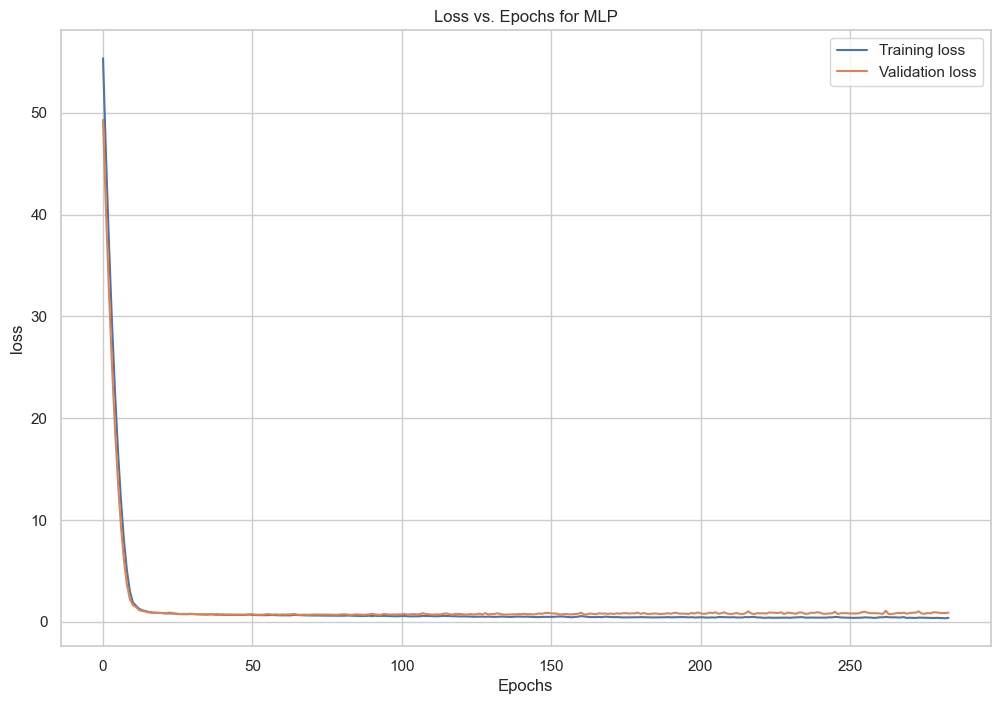

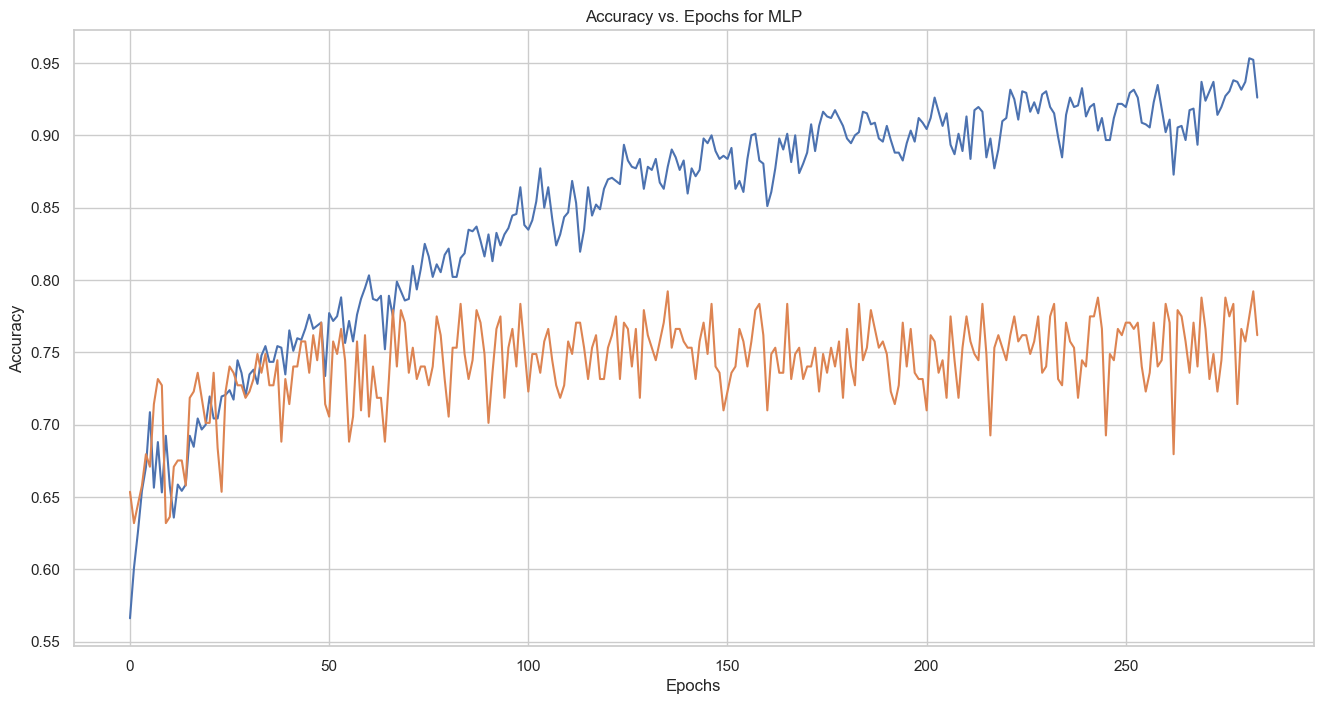

<Figure size 1600x800 with 0 Axes>

In [370]:
# Plot accuracy versus epochs
plt.figure(figsize=(12,8))        
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss vs. Epochs for MLP')
plt.legend()

plt
plt.figure(figsize=(16,8))           
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for MLP')

plt.figure(figsize=(16,8))           
plt.plot(history.history['recall_13'], label='Training recall')
plt.plot(history.history['val_recall_13'], label='Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs. Epochs for MLP')


plt.show()

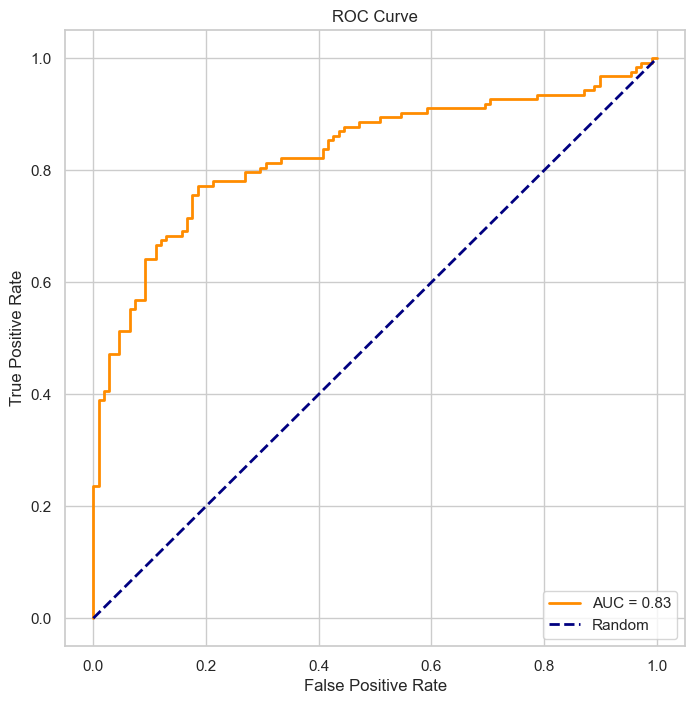

In [371]:
from sklearn.metrics import roc_curve,auc

# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, predictions_cnn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()